# Dynamic Linear Models

In [1]:
from utilities.std_imports import *
import pydlm 
plt.rcParams['figure.figsize'] = (22, 6)

## Simple example
(random walk)

In [2]:
n = 100
a = 1.0 + np.random.normal(0, 5, n) # the intercept
x = np.random.normal(0, 2, n) # the control variable
b = 3.0 # the coefficient
y = a + b * x

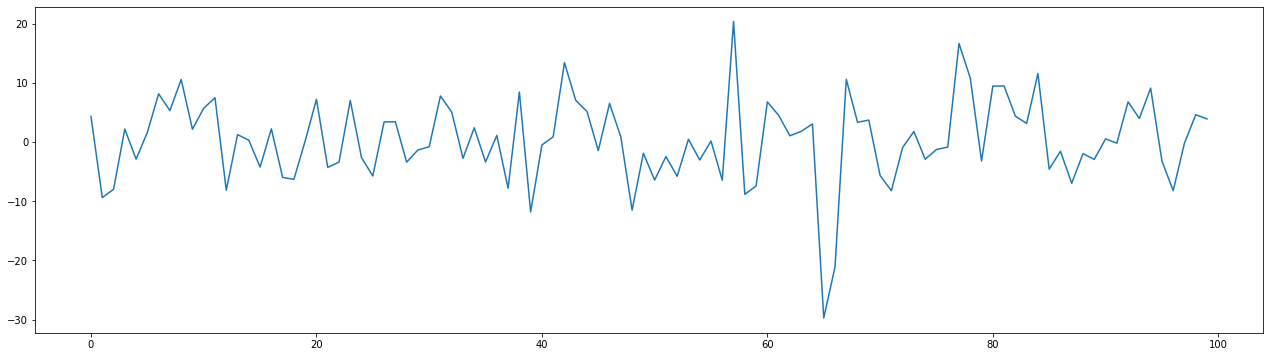

In [3]:
plt.plot(y);

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.


c:\program files\python38\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


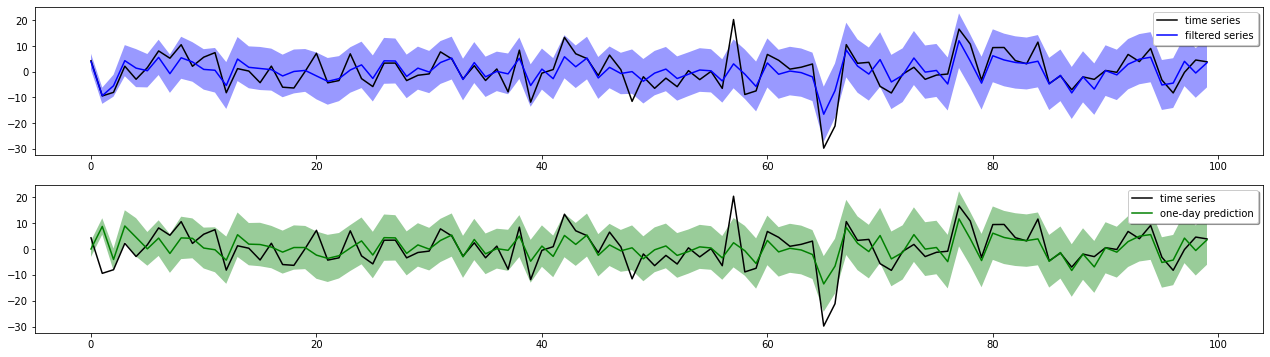

In [4]:
dlm = pydlm.dlm(y)
dlm = dlm + pydlm.trend(degree=0, discount=0.98, name='a', w=10.0)
dlm = dlm + pydlm.dynamic(features=[[v] for v in x], discount=1, name='b', w=10.0)
dlm.fitForwardFilter()
dlm.plot()

### Only Level & trend

##### Generate data

In [7]:
ts = [0] * 100 + [3] * 100

##### Build model

In [19]:
dlm = pydlm.dlm(ts)
dlm = dlm + pydlm.trend(degree=1, name='lineTrend', w=1.0) 
dlm = dlm + pydlm.seasonality(period=7, name='7day', w=1.0)
dlm = dlm + pydlm.autoReg(degree=3, name='ar3', w=1.0)
dlm.ls()

The static components are
lineTrend (degree = 2)
7day (degree = 7)
 
There is no dynamic component.
 
The automatic components are
ar3 (dimension = 3)


In [20]:
dlm.fitForwardFilter()
dlm.fitBackwardSmoother()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


##### Plot

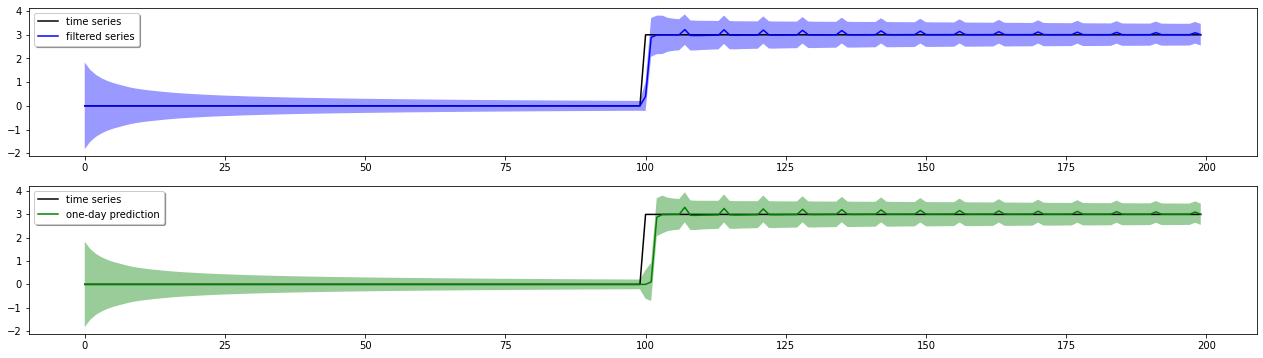

In [23]:
dlm.turnOff('smoothed plot')
dlm.plot()

### With seasonality

In [24]:
dlm = dlm + pydlm.seasonality(4)
dlm.ls()
dlm.fit()

The static components are
lineTrend (degree = 2)
7day (degree = 7)
seasonality (degree = 4)
 
There is no dynamic component.
 
The automatic components are
ar3 (dimension = 3)
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


##### Missing observations

In [25]:
ts = [1, 0, 0, 1, 0, 0, None, 0, 1, None, None, 0, 0]
dlm = pydlm.dlm(ts) + pydlm.trend(degree=1, w=1.0)
dlm.fit() 

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


##### Tunning

In [26]:
mt = pydlm.modelTuner(method='gradient_descent', loss='mse')
dlm2 = mt.tune(dlm, maxit=100)
dlm2.fit()

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


##### Results

In [27]:
print("MSE 1 : ", dlm.getMSE())
print("MSE 2 : ", dlm2.getMSE())

MSE 1 :  0.3759422890610195
MSE 2 :  0.37301856100886865


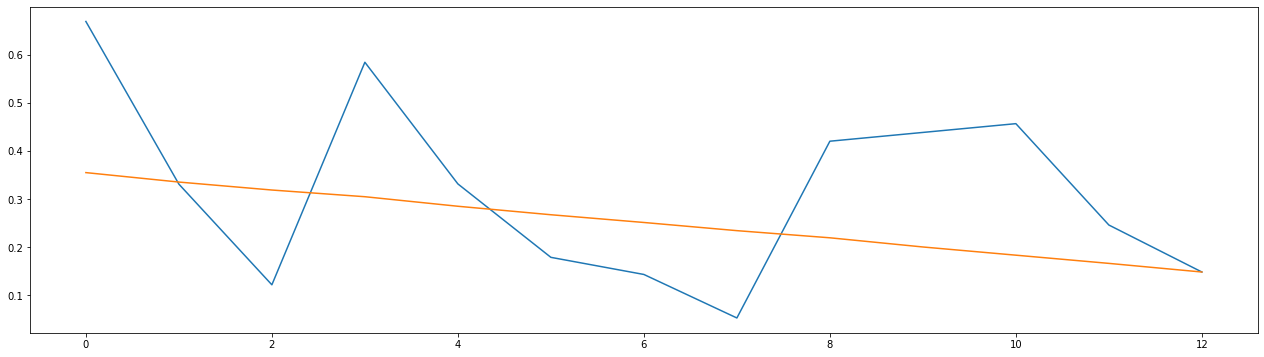

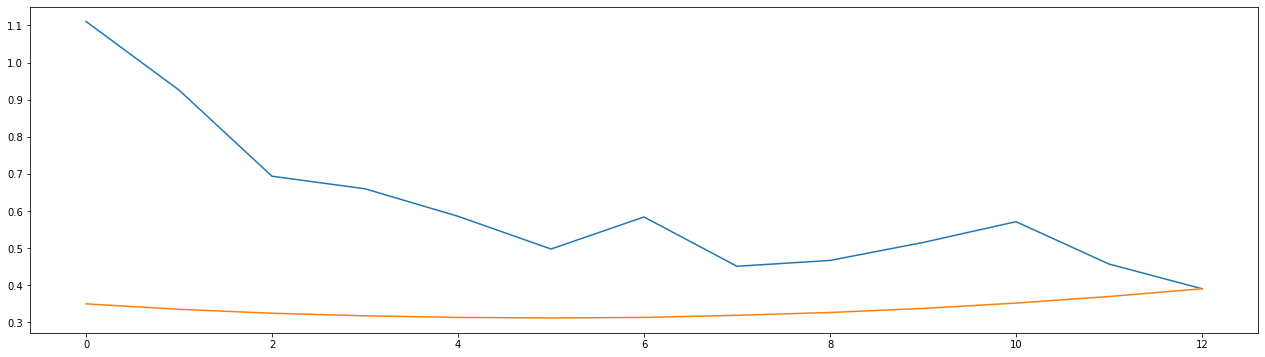

In [29]:
# Filtered results
filtMean = dlm.getMean(filterType='forwardFilter')
smoothMean = dlm.getMean(filterType='backwardSmoother')
filtVar = dlm.getVar(filterType='forwardFilter')
smoothVar = dlm.getVar(filterType='backwardSmoother')

plt.plot(filtMean)
plt.plot(smoothMean)
plt.show()
plt.plot(filtVar)
plt.plot(smoothVar)
plt.show()

### Post-Analysis

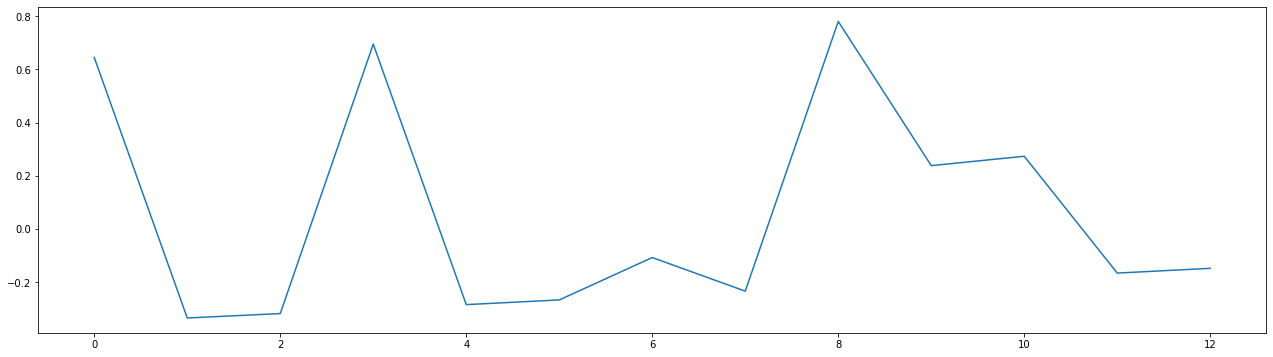

In [30]:
filtCI = dlm.getInterval(filterType='forwardFilter')
smoothCI = dlm.getInterval(filterType='backwardSmoother')

res = dlm.getResidual(filterType='backwardSmoother')

plt.plot(res);

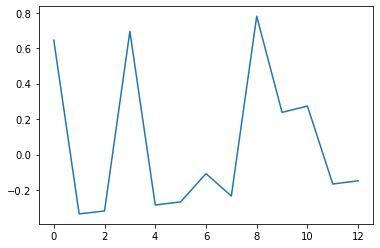

In [16]:
# get the filtered and smoothed mean for a given component
#filtTrend = dlm.getMean(filterType='forwardFilter', name='lineTrend')
#smoothTrend = dlm.getMean(filterType='backwardSmoother', name='lineTrend')

# get the latent states
#allStates = dlm.getLatentState(filterType='forwardFilter')
#trendStates = dlm.getLatentState(filterType='forwardFilter', name='lineTrend')

# Update
#dlm = dlm([]) + pydlm.trend(1) + pydlm.seasonality(7)
#for t in range(0, len(data)):
    #dlm.append([data[t]])
    #dlm.fitForwardFilter()
#filteredObs = dlm.getFilteredObs()

## Credits & Links

https://pydlm.github.io/example1.html#dynamic-linear-regression